In [272]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [273]:
df = pd.read_csv('./NFLX.csv')

### Showing first 5 rows of the head

In [335]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


### Show the description and the info of the data set

In [275]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


### Ensure that any date columns have been cast into a datetime object in your DataFrame

In [326]:
# Creates a date time object, and sets it to X. Takes "Volume" column and puts it into a y variable
df_dates = df['Date']
df_years = pd.DatetimeIndex(df_dates).year
X = df_years.values
y = df['Volume'].values


In [303]:
# Creates a column vector
X = X.reshape(-1,1)
X

array([[2015],
       [2015],
       [2015],
       ...,
       [2019],
       [2019],
       [2019]])

### Using a regression model, split your data into train and test data.

In [309]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (805, 1)
y_train shape (805,)
X_test shape (202, 1)
y_test shape (202,)


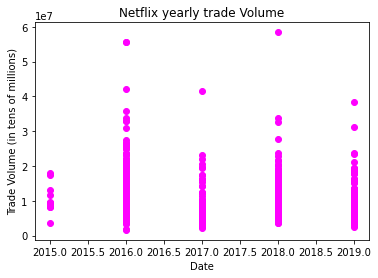

In [340]:
%matplotlib inline
plt.scatter(x_train,y_train,color='magenta')
plt.xlabel('Date')
plt.ylabel('Trade Volume (in tens of millions)')
plt.title('Netflix yearly trade Volume')
plt.show()

In [341]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 2.92 %
Test accuracy 2.48 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

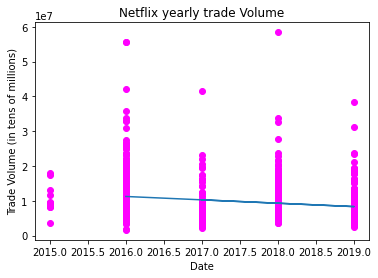

In [342]:
plt.scatter(x_train,y_train,color='magenta')
plt.plot(x_test,y_predict)
plt.xlabel('Date')
plt.ylabel('Trade Volume (in tens of millions)')
plt.title('Netflix yearly trade Volume')
plt.plot

In [343]:
years = 10
volume_predict = lm.predict([[years]])[0]
print(f"After {years} years your volume is predicted to be around {int(volume_predict)}")

After 10 years your volume is predicted to be around 1957668788


### Show your regression model’s score.


In [344]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.024842229467566757

### 3 Conclusions
1. My test data was very inaccurate
2. Netflix has been performing consistently over the span of 3 or so years
3. 2016 was the best performing year for Netflix (from 2015-2019)